# Подготовка датасета

In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
data = pd.read_csv("dataset.csv")

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       74 non-null     int64 
 1   type                     74 non-null     object
 2   purpose                  74 non-null     object
 3   stack                    74 non-null     object
 4   predicted_count_users    74 non-null     int64 
 5   payment_system           74 non-null     object
 6   geolocation              74 non-null     object
 7   budget                   74 non-null     object
 8   design                   74 non-null     object
 9   adaptability             74 non-null     object
 10  product_delivery         74 non-null     object
 11  integration_systems      74 non-null     object
 12  integration_systems_API  74 non-null     object
 13  required_DB              74 non-null     object
 14  languages                74 non-null     obj

In [764]:
data.head()

,id,type,purpose,stack,predicted_count_users,payment_system,geolocation,budget,design,adaptability,product_delivery,integration_systems,integration_systems_API,required_DB,languages,final_price,development_time
0,1,site,shop,Django,1200,True,True,100-1000,exist,adaptive,full_deployment,True,True,True,"en, ru",1000,160
1,2,chat-bot,shop,Python,10,True,False,20-400,template,fixed,full_deployment,False,False,True,ru,400,80
2,3,site,landing_page,Django,5000,True,True,1000-8000,individual,adaptive,full_deployment,True,True,True,"ru, en",4500,414
3,4,site,web_application,Flask,2000,False,True,500-3000,template,adaptive,integration,False,False,True,ru,860,80
4,5,site,landing_page,Tilda,150,False,False,100-300,template,fixed,integration,False,False,False,en,290,60


In [380]:
data = data.drop('Unnamed: 17', axis=1)

In [628]:
data.replace("no", False, inplace=True)
data.replace("yes", True, inplace=True)

In [646]:
features_to_encode = ["stack", "type", "purpose", "design", "adaptability", "product_delivery"]

dummies = pd.get_dummies(data[features_to_encode])
res = pd.concat([data, dummies], axis=1)
res = res.drop(features_to_encode, axis=1)

In [765]:
dummies

,stack_C#,stack_C/C++,stack_Django,stack_Flask,stack_JS,stack_Laravel,stack_Other,stack_PHP,stack_Python,stack_Tilda,...,purpose_web_application,design_exist,design_individual,design_tamplate,design_template,adaptability_adaptive,adaptability_fixed,product_delivery_Saas,product_delivery_full_deployment,product_delivery_integration
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
70,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
72,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [657]:
types_list = res.languages.apply(lambda x: list(x.split(", ")))# Converting it into dataframe and working on it seperately
types_df = pd.DataFrame({"languages":types_list})
types_df.head()

,languages
0,"[en, ru]"
1,[ru]
2,"[ru, en]"
3,[ru]
4,[en ]


In [658]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
types_encoded = pd.DataFrame(mlb.fit_transform(types_df["languages"]), columns="languages_"+mlb.classes_)
types_encoded.head()

,languages_de,languages_en,languages_en,languages_fr,languages_ru
0,0,1,0,0,1
1,0,0,0,0,1
2,0,1,0,0,1
3,0,0,0,0,1
4,0,0,1,0,0


In [659]:
df = pd.concat([res,types_encoded], axis = 1)
df = df.drop(columns="languages")
df.head()

,id,predicted_count_users,payment_system,geolocation,budget,integration_systems,integration_systems_API,required_DB,final_price,development_time,...,adaptability_adaptive,adaptability_fixed,product_delivery_Saas,product_delivery_full_deployment,product_delivery_integration,languages_de,languages_en,languages_en,languages_fr,languages_ru
0,1,1200,True,True,100-1000,True,True,True,1000,160,...,1,0,0,1,0,0,1,0,0,1
1,2,10,True,False,20-400,False,False,True,400,80,...,0,1,0,1,0,0,0,0,0,1
2,3,5000,True,True,1000-8000,True,True,True,4500,414,...,1,0,0,1,0,0,1,0,0,1
3,4,2000,False,True,500-3000,False,False,True,860,80,...,1,0,0,0,1,0,0,0,0,1
4,5,150,False,False,100-300,False,False,False,290,60,...,0,1,0,0,1,0,0,1,0,0


In [660]:
df[['start_budget', 'end_budget']] = df['budget'].str.split('-', 1, expand=True)
df = df.drop("budget", axis=1)
df.head()

,id,predicted_count_users,payment_system,geolocation,integration_systems,integration_systems_API,required_DB,final_price,development_time,stack_C#,...,product_delivery_Saas,product_delivery_full_deployment,product_delivery_integration,languages_de,languages_en,languages_en,languages_fr,languages_ru,start_budget,end_budget
0,1,1200,True,True,True,True,True,1000,160,0,...,0,1,0,0,1,0,0,1,100,1000
1,2,10,True,False,False,False,True,400,80,0,...,0,1,0,0,0,0,0,1,20,400
2,3,5000,True,True,True,True,True,4500,414,0,...,0,1,0,0,1,0,0,1,1000,8000
3,4,2000,False,True,False,False,True,860,80,0,...,0,0,1,0,0,0,0,1,500,3000
4,5,150,False,False,False,False,False,290,60,0,...,0,0,1,0,0,1,0,0,100,300


In [661]:
df = df.drop(columns="id")

In [662]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled_time = df.copy()
for c in ["predicted_count_users", "development_time", "start_budget", "end_budget"]:
    df_scaled_time[[c]] = ss.fit_transform(df_scaled_time[[c]])
df_scaled_time.head()

,predicted_count_users,payment_system,geolocation,integration_systems,integration_systems_API,required_DB,final_price,development_time,stack_C#,stack_C/C++,...,product_delivery_Saas,product_delivery_full_deployment,product_delivery_integration,languages_de,languages_en,languages_en,languages_fr,languages_ru,start_budget,end_budget
0,0.113158,True,True,True,True,True,1000,0.475906,0,0,...,0,1,0,0,1,0,0,1,-0.667574,-0.406400
1,-0.525603,True,False,False,False,True,400,-0.201671,0,0,...,0,1,0,0,0,0,0,1,-0.800864,-0.722188
2,2.152898,True,True,True,True,True,4500,2.627211,0,0,...,0,1,0,0,1,0,0,1,0.831935,3.277798
3,0.542577,False,True,False,False,True,860,-0.201671,0,0,...,0,0,1,0,0,0,0,1,-0.001126,0.646228
4,-0.450455,False,False,False,False,False,290,-0.371065,0,0,...,0,0,1,0,0,1,0,0,-0.667574,-0.774820


In [663]:
y = df_scaled_time["final_price"]
pearson = df_scaled_time.corr(method="pearson")
pearson["final_price"].drop("final_price").sort_values(ascending=False)

development_time                    0.900040
end_budget                          0.888652
start_budget                        0.738510
design_individual                   0.514348
required_DB                         0.449411
integration_systems_API             0.443436
purpose_web_application             0.398805
predicted_count_users               0.352084
stack_C/C++                         0.332123
product_delivery_full_deployment    0.324905
stack_PHP                           0.299527
languages_fr                        0.291358
payment_system                      0.255170
adaptability_adaptive               0.232844
purpose_shop                        0.220853
stack_Django                        0.219632
languages_ru                        0.174832
languages_en                        0.169225
purpose_sales_funnel                0.167136
integration_systems                 0.107436
type_chat-bot                       0.072482
stack_Laravel                       0.054781
languages_

In [664]:
y = df_scaled_time["final_price"]
df_scaled_time = df_scaled_time.drop(columns="final_price")

In [704]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled_time, y, test_size=0.50, shuffle=True, random_state = 1)
x_train_no_time = x_train.drop(columns="development_time")
x_test_no_time = x_test.drop(columns="development_time")

# Создание моделей

In [705]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import *
from math import sqrt

In [757]:
def regression_plotter(y_test, y_predicted, model, name_model):
    f, ax = plt.subplots(figsize=[20,10])
    ax.plot(y_predicted[:100], 'r-', label='Predicted')
    if isinstance(y_test, (np.ndarray, np.generic)):
        ax.plot(y_test[:100], 'b-', label='Correct')
    else:
        ax.plot(y_test.values[:100], 'b-', label='Correct')
    ax.set_xlabel("Observations")
    ax.set_ylabel("Scores")
    ax.legend()
    
    w, r = 0, 0 
    for x, y in zip(y_predicted, y_test):
        if int(round(x) == y):
            r += 1
        else:
            w += 1
    if hasattr(model, "coef_"):
        coefs = [[col, cf] for cf, col in zip(model.coef_, df.columns)]

        if coefs:
            f, ax = plt.subplots(figsize=[20,10])
            ax.set_xlabel("Features")
            ax.set_ylabel("Weights")
            for x in coefs:
                ax.scatter(x[0], x[1])
    
    f, ax = plt.subplots(figsize=[10,10])
    ax.scatter(y_test, y_predicted)
    ax.set_xlabel("Prices: $Y_i$")
    ax.set_ylabel("Predicted prices: $\hat{Y}_i$")
    ax.set_title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    
    print (name_model)
    print ("Количество НЕправильных:", w)
    print ("Количество правильных:", r)
    print ("Процент точного попадания в ответ:", r/(w+r) * 100, "%\n")
    print ("Метрики:")
    print ("Среднеквадратичная ошибка:", mean_squared_error(y_pred=y_predicted, y_true=y_test))
    print ("Корень среднеквадратичной ошибки:", sqrt(mean_squared_error(y_pred=y_predicted, y_true=y_test)))
    print ("Кф детерминации:", r2_score(y_pred=y_predicted, y_true=y_test))


In [708]:
x_train_poly = {}
x_train_no_time_poly = {}
x_test_poly = {}
x_test_no_time_poly = {}
for i in range(2, 5):
    poly = PolynomialFeatures(i, include_bias=False)
    x_train_poly[f"{i}"] = poly.fit_transform(x_train)
    x_test_poly[f"{i}"] = poly.fit_transform(x_test)
    x_train_no_time_poly[f"{i}"] = poly.fit_transform(x_train_no_time)
    x_test_no_time_poly[f"{i}"] = poly.fit_transform(x_test_no_time)

In [709]:
linear_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'n_jobs': range(1, 15)
}
lasso_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': range(1, 15),
    'alpha': np.linspace(1e-4, 1000, 200),
    'tol': np.linspace(1e-6, 1, 1000),
    'selection': ['cyclic', 'random']
}

ridge_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': range(1, 100),
    'alpha': np.linspace(1e-4, 1000, 200),
    'tol': np.linspace(1e-6, 1, 1000),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

knr_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}

dtr_params = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rfr_params = {
    'n_estimators': range(1, 200),
    'criterion': ['mse', 'mae'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Модели с предсказанием по времени

In [710]:
linear_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(linear_time)

linear_poly_2_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_poly["2"], y_train).best_estimator_

print(linear_poly_2_time)

linear_poly_3_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_poly["3"], y_train).best_estimator_

print(linear_poly_3_time)

linear_poly_4_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_poly["4"], y_train).best_estimator_

print(linear_poly_4_time)

lasso_time = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=lasso_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(lasso_time)

ridge_time = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=ridge_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(ridge_time)

knr_time = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knr_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(knr_time)

dtr_time = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dtr_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(dtr_time)

rfr_time = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(rfr_time)

LinearRegression(n_jobs=3, normalize=True)
LinearRegression(n_jobs=12)
LinearRegression(n_jobs=13)
LinearRegression(n_jobs=12)
Lasso(alpha=195.9799798994975, max_iter=13, selection='random',
      tol=0.8628629999999999)
Ridge(alpha=0.0001, fit_intercept=False, max_iter=60, tol=0.620621)
KNeighborsRegressor(leaf_size=28, n_neighbors=2)
DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_split=4,
                      splitter='random')
RandomForestRegressor(criterion='mae', max_depth=5, min_samples_split=7,
                      n_estimators=59)


In [ ]:
linear_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(linear_time)

linear_poly_2_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_poly["2"], y_train).best_estimator_

print(linear_poly_2_time)

linear_poly_3_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_poly["3"], y_train).best_estimator_

print(linear_poly_3_time)

linear_poly_4_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_poly["4"], y_train).best_estimator_

print(linear_poly_4_time)

lasso_time = GridSearchCV(
    estimator=Lasso(),
    param_grid=lasso_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(lasso_time)

ridge_time = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(ridge_time)

knr_time = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=knr_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(knr_time)

dtr_time = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=dtr_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(dtr_time)

rfr_time = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=rfr_params,
    scoring='neg_mean_squared_error'
).fit(x_train, y_train).best_estimator_

print(rfr_time)

# Модели с предсказанием без времени

In [711]:
linear_no_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(linear_no_time)

linear_poly_2_no_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time_poly["2"], y_train).best_estimator_

print(linear_poly_2_no_time)

linear_poly_3_no_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time_poly["3"], y_train).best_estimator_

print(linear_poly_3_no_time)

linear_poly_4_no_time = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time_poly["4"], y_train).best_estimator_

print(linear_poly_4_no_time)


lasso_no_time = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=lasso_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(lasso_no_time)

ridge_no_time = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=ridge_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(ridge_no_time)

knr_no_time = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(knr_no_time)

dtr_no_time = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dtr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(dtr_no_time)

rfr_no_time = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(rfr_no_time)

LinearRegression(fit_intercept=False, n_jobs=2, normalize=True)
LinearRegression(n_jobs=13)
LinearRegression(n_jobs=1)
LinearRegression(n_jobs=1)
Lasso(alpha=221.1056055276382, max_iter=8, tol=0.97998)
Ridge(alpha=125.62822814070353, fit_intercept=False, max_iter=61,
      solver='cholesky', tol=0.20820899999999998)
KNeighborsRegressor(leaf_size=21, metric='euclidean', n_neighbors=2,
                    weights='distance')
DecisionTreeRegressor(criterion='mae', max_depth=4, min_samples_split=9)
RandomForestRegressor(criterion='mae', max_depth=5, max_features=None,
                      min_samples_split=5, n_estimators=133)


In [ ]:
linear_no_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(linear_no_time)

linear_poly_2_no_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time_poly["2"], y_train).best_estimator_

print(linear_poly_2_no_time)

linear_poly_3_no_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time_poly["3"], y_train).best_estimator_

print(linear_poly_3_no_time)

linear_poly_4_no_time = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time_poly["4"], y_train).best_estimator_

print(linear_poly_4_no_time)


lasso_no_time = GridSearchCV(
    estimator=Lasso(),
    param_grid=lasso_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(lasso_no_time)

ridge_no_time = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(ridge_no_time)

knr_no_time = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=knr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(knr_no_time)

dtr_no_time = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=dtr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(dtr_no_time)

rfr_no_time = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=rfr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_no_time, y_train).best_estimator_

print(rfr_no_time)

In [712]:
models = {
    'linear_time': linear_time,
    'linear_poly_2_time': linear_poly_2_time,
    'linear_poly_3_time': linear_poly_3_time,
    'linear_poly_4_time': linear_poly_4_time,
    'lasso_time': lasso_time,
    'ridge_time': ridge_time,
    'knr_time': knr_time,
    'dtr_time': dtr_time,
    'rfr_time': rfr_time,
    'linear_no_time': linear_no_time,
    'linear_poly_2_no_time': linear_poly_2_no_time,
    'linear_poly_3_no_time': linear_poly_3_no_time,
    'linear_poly_4_no_time': linear_poly_4_no_time,
    'lasso_no_time': lasso_no_time,
    'ridge_no_time': ridge_no_time,
    'knr_no_time': knr_no_time,
    'dtr_no_time': dtr_no_time,
    'rfr_no_time': rfr_no_time
}

In [713]:
metrics = {
    'r2_score': r2_score, 
    'explained_variance_score': explained_variance_score,
    'max_error': max_error,
    'mean_absolute_error': mean_absolute_error,
    'mean_squared_error': mean_squared_error,
    'median_absolute_error': median_absolute_error
}

In [714]:
models_results = pd.DataFrame(columns=metrics.keys())

In [715]:
for model_name, model in models.items():
    if "no_time" not in model_name:
        y_pred = model.predict(x_test_poly[model_name.split("_")[2]] if "poly" in model_name else x_test)
    else:
        y_pred = model.predict(x_test_no_time_poly[model_name.split("_")[2]] if "poly" in model_name else x_test_no_time)
    
    for metric_name, metric in metrics.items():
        models_results.loc[model_name, metric_name] = metric(y_test, y_pred)

In [716]:
models_results.sort_values("r2_score", ascending=False)

,r2_score,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error
linear_poly_3_time,0.932988,0.933786,888.954936,190.985653,77553.791185,121.16683
linear_poly_4_time,0.928544,0.928581,973.426205,187.707415,82696.67143,131.489457
linear_poly_2_time,0.92114,0.922668,858.078016,217.982954,91265.718028,158.816524
knr_no_time,0.911898,0.919157,773.608293,233.448012,101961.182152,150.0
knr_time,0.901378,0.919968,885.0,259.378378,114135.324324,225.0
linear_poly_3_no_time,0.864417,0.876528,1197.782579,282.729644,156911.353054,193.780865
linear_poly_2_no_time,0.850546,0.865961,1298.877302,307.786759,172964.013762,232.548178
linear_poly_4_no_time,0.839541,0.847825,1675.215558,277.232829,185699.935434,194.636858
lasso_time,0.804441,0.804563,1320.291772,343.452577,226321.652014,233.309955
rfr_time,0.802586,0.806154,1280.711864,330.066422,228468.207839,241.813559


knr_no_time
Количество НЕправильных: 33
Количество правильных: 4
Процент точного попадания в ответ: 10.81081081081081 %

Метрики:
Среднеквадратичная ошибка: 101961.18215236776
Корень среднеквадратичной ошибки: 319.3136109726107
Кф детерминации: 0.9118978398121209


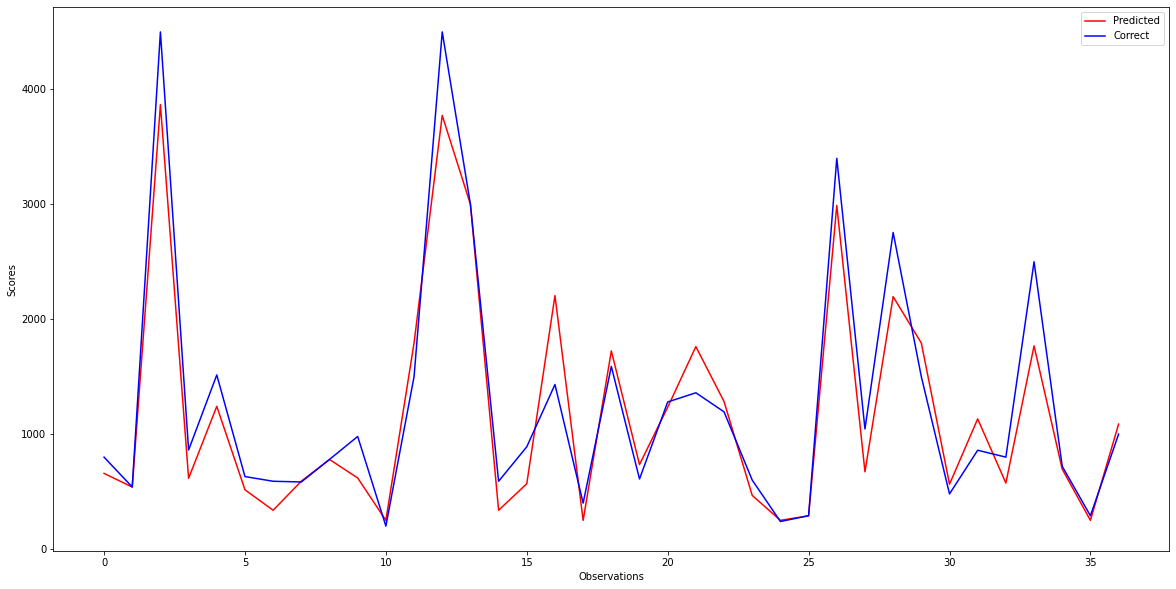

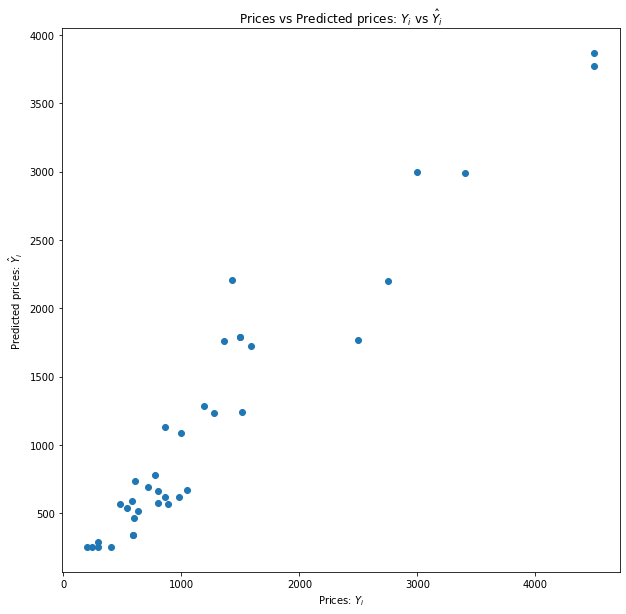

In [717]:
regression_plotter(y_test, knr_no_time.predict(x_test_no_time), knr_no_time, "knr_no_time")

# Модель для предсказания времени разработки по предсказанной заранее цене

In [740]:
x_train_price, x_test_price, y_train_price, y_test_price = train_test_split(data["final_price"], data["development_time"], test_size=0.50, shuffle=True, random_state = 1)
x_train_price = np.array(x_train_price).reshape(-1, 1)
x_test_price = np.array(x_test_price).reshape(-1, 1)
y_train_price, y_test_price = np.array(y_train_price).reshape(-1, 1), np.array(y_test_price).reshape(-1, 1)

In [741]:
x_train_price_poly = {}
x_test_price_poly = {}
for i in range(2, 5):
    poly = PolynomialFeatures(i, include_bias=False)
    x_train_price_poly[f"{i}"] = poly.fit_transform(x_train_price)
    x_test_price_poly[f"{i}"] = poly.fit_transform(x_test_price)

In [742]:
price_models = {}

In [748]:
price_models["linear_price"] = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price, y_train_price).best_estimator_

print(price_models["linear_price"])

price_models["linear_poly_2_price"] = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price_poly["2"], y_train_price).best_estimator_

print(price_models["linear_poly_2_price"])

price_models["linear_poly_3_price"] = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price_poly["3"], y_train_price).best_estimator_

print(price_models["linear_poly_3_price"])

price_models["linear_poly_4_price"] = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price_poly["4"], y_train_price).best_estimator_

print(price_models["linear_poly_4_price"])


price_models["lasso_price"] = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=lasso_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price, y_train_price).best_estimator_

print(price_models["lasso_price"])

price_models["ridge_price"] = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=ridge_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price, y_train_price).best_estimator_

print(price_models["ridge_price"])

price_models["knr_price"] = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price, y_train_price).best_estimator_

print(price_models["knr_price"])

price_models["dtr_price"] = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dtr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price, y_train_price).best_estimator_

print(price_models["dtr_price"])

price_models["rfr_price"] = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    scoring='neg_mean_squared_error'
).fit(x_train_price, y_train_price).best_estimator_

print(price_models["rfr_price"])

LinearRegression(fit_intercept=False, n_jobs=4)
LinearRegression(n_jobs=13, normalize=True)
LinearRegression(n_jobs=6)
LinearRegression(fit_intercept=False, n_jobs=2)
Lasso(alpha=522.6131130653266, fit_intercept=False, max_iter=1,
      selection='random', tol=0.30931)
Ridge(alpha=321.608108040201, fit_intercept=False, max_iter=61, solver='svd',
      tol=0.35535599999999995)
KNeighborsRegressor(algorithm='kd_tree', leaf_size=6, metric='euclidean',
                    n_neighbors=4)
DecisionTreeRegressor(max_depth=2, min_samples_split=3)
RandomForestRegressor(max_depth=2, max_features='log2', n_estimators=177)


In [744]:
price_models_results = pd.DataFrame(columns=metrics.keys())

In [749]:
for model_name, model in price_models.items():
    y_pred_price = model.predict(x_test_price_poly[model_name.split("_")[2]] if "poly" in model_name else x_test_price)
    
    for metric_name, metric in metrics.items():
        price_models_results.loc[model_name, metric_name] = metric(y_test_price, y_pred_price)

In [750]:
price_models_results.sort_values("r2_score", ascending=False)

,r2_score,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error
knr_price,0.870257,0.879766,130.75,25.277027,1329.552365,16.75
lasso_price,0.8361,0.88139,144.605508,31.17582,1679.568256,27.387081
ridge_price,0.835018,0.881228,145.190382,31.332057,1690.656158,27.495627
linear_price,0.835017,0.881228,145.191285,31.332298,1690.673407,27.495794
linear_poly_3_price,0.80199,0.814713,133.572747,30.001899,2029.112329,20.147005
linear_poly_2_price,0.793613,0.803287,142.85549,30.220305,2114.963609,19.90859
rfr_price,0.748855,0.770371,150.957762,36.083864,2573.623633,24.081156
linear_poly_4_price,0.681812,0.723735,163.20637,38.737869,3260.649943,22.945746
dtr_price,0.566212,0.603095,201.714286,45.706564,4445.267267,27.285714


TypeError: type numpy.ndarray doesn't define __round__ method

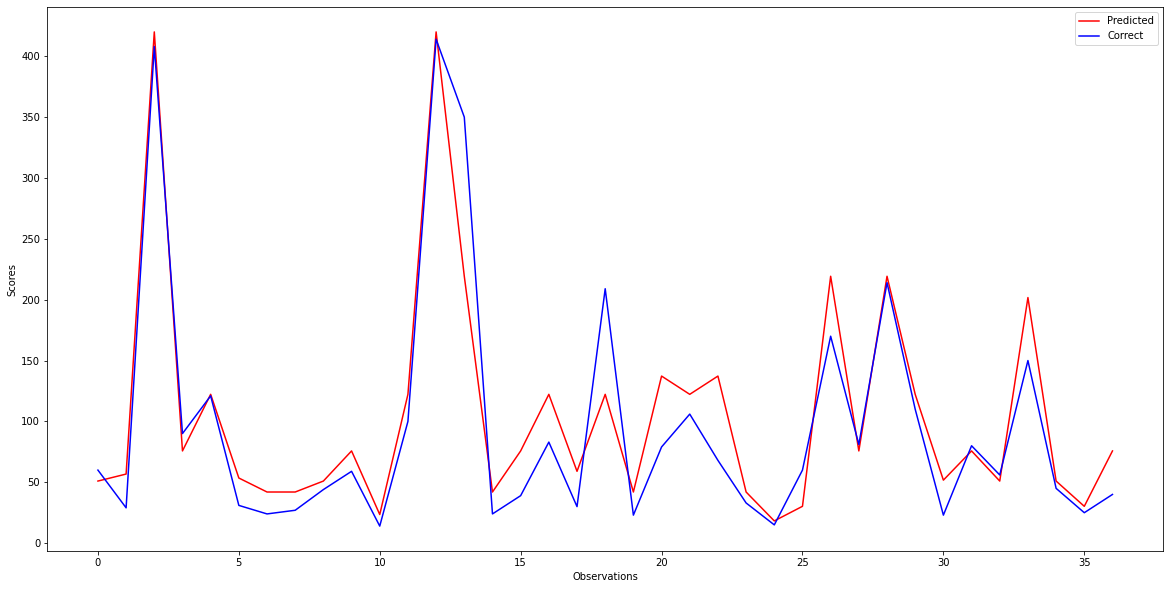

In [760]:
regression_plotter(y_test_price, price_models["knr_price"].predict(x_test_price),  price_models["knr_price"], "knr_price")